# <center> 생체 데이터 분석 캡스톤 디자인</center>

## 라이브러리 준비<br>

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 데이터 가져오기
제 핏빗 데이터와 추가적으로 [30여명의 핏빗 데이터(2016)](https://www.kaggle.com/arashnic/fitbit)를 사용하였습니다

In [176]:
daily_act = pd.read_csv("archive/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_sleep = pd.read_csv("archive/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
my_act = pd.read_csv("archive/my_activity.csv")
my_sleep=pd.read_csv("archive/my_sleep.csv")

In [177]:
daily_act.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [178]:
daily_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

## 데이터 전처리
.head(), .info()를 사용하여 데이터를 확인한 결과 날짜를 의미하는 ActivityDate특성이 object형임을 알 수 있다<br>
이를 datetime특성(DayName)으로 변환하고 요일을 의미하는 DayofWeek특성을 새로만든 이후object형 날짜(ActivityDate)는 제거한다 

In [179]:
daily_act['DayName']=  pd.to_datetime(daily_act['ActivityDate'])
daily_act["DayofWeek"] = daily_act["DayName"].dt.day_name()
daily_act = daily_act.drop(["ActivityDate"], axis=1)
my_act["DayName"] =  pd.to_datetime(my_act['dateTime'])
my_act["DayofWeek"] = my_act["DayName"].dt.day_name()
my_act = my_act.drop(["dateTime"], axis=1)

다시 한번 ,info()를 이용해 성공적으로 특성을 제거, 추가 했다는걸 알 수 있다.

In [180]:
daily_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   TotalSteps                940 non-null    int64         
 2   TotalDistance             940 non-null    float64       
 3   TrackerDistance           940 non-null    float64       
 4   LoggedActivitiesDistance  940 non-null    float64       
 5   VeryActiveDistance        940 non-null    float64       
 6   ModeratelyActiveDistance  940 non-null    float64       
 7   LightActiveDistance       940 non-null    float64       
 8   SedentaryActiveDistance   940 non-null    float64       
 9   VeryActiveMinutes         940 non-null    int64         
 10  FairlyActiveMinutes       940 non-null    int64         
 11  LightlyActiveMinutes      940 non-null    int64         
 12  SedentaryMinutes      

# 시각화

<AxesSubplot:xlabel='Calories', ylabel='DayofWeek'>

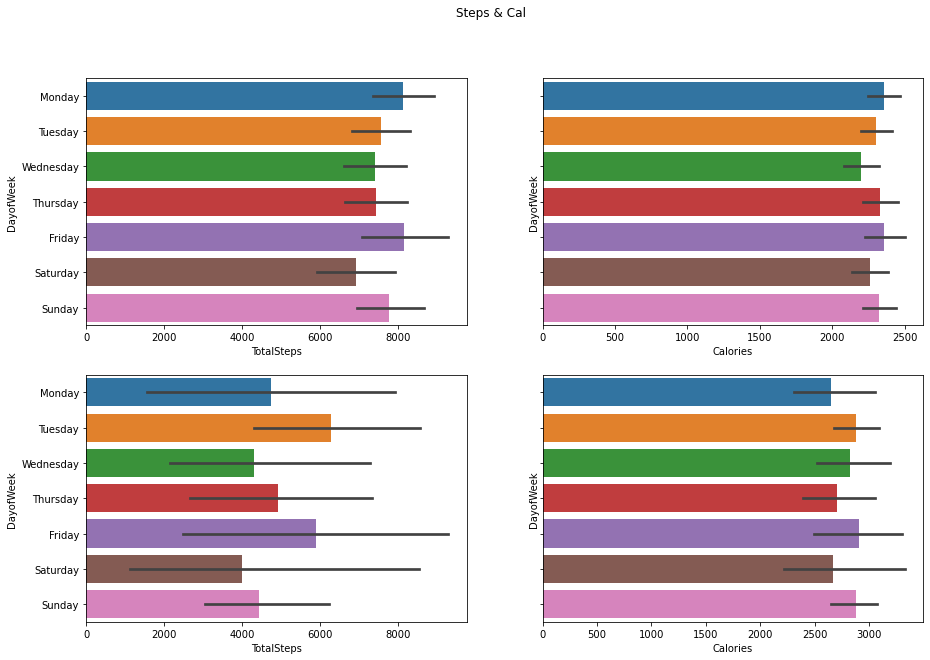

In [181]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Steps & Cal')
sns.barplot(ax=axes[0,0], x=daily_act["TotalSteps"], y = daily_act["DayofWeek"])
sns.barplot(ax=axes[0,1],x = daily_act["Calories"], y = daily_act["DayofWeek"])
sns.barplot(ax=axes[1,0], x=my_act["TotalSteps"], y = my_act["DayofWeek"])
sns.barplot(ax=axes[1,1],x = my_act["Calories"], y = my_act["DayofWeek"])

왼쪽이 30명의 fitbit data, 오른쪽이 나의 fitbit data이다

전체적으로 걸음수가 불규칙적이고 평균이 낮으며
월요일날 활동량이 많은 다른 사람들과 다르게 화요일날 높으며
토요일 뿐만 아니라 수요일도 활동량이 낮은 이유는 보통  수요일날 랩미팅 준비를 위해 앉아있는 시간이 길어서 그런것 예상한다<br>

C:\Users\hjhhi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


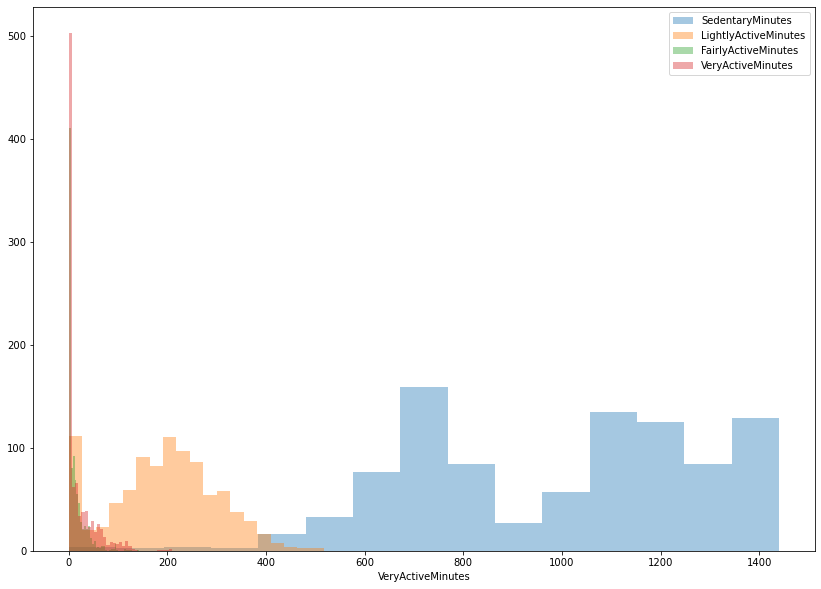

In [182]:
plt.figure(figsize=(14,10))
sns.distplot(a=daily_act["SedentaryMinutes"],label="SedentaryMinutes", kde=False)
sns.distplot(a=daily_act["LightlyActiveMinutes"],label="LightlyActiveMinutes", kde=False)
sns.distplot(a=daily_act["FairlyActiveMinutes"],label="FairlyActiveMinutes", kde=False)
sns.distplot(a=daily_act["VeryActiveMinutes"],label="VeryActiveMinutes", kde=False)
plt.legend()

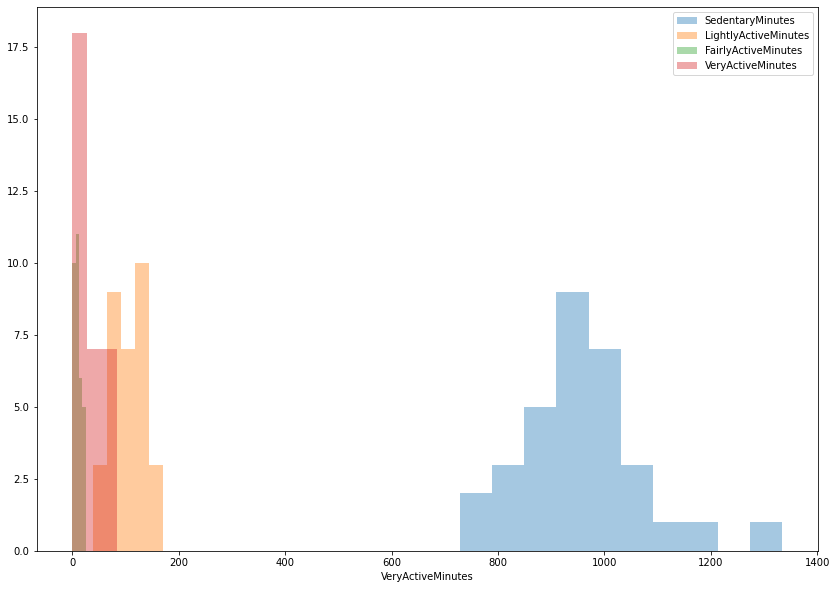

In [183]:
plt.figure(figsize=(14,10))
sns.distplot(a=my_act["SedentaryMinutes"],label="SedentaryMinutes", kde=False)
sns.distplot(a=my_act["LightlyActiveMinutes"],label="LightlyActiveMinutes", kde=False)
sns.distplot(a=my_act["FairlyActiveMinutes"],label="FairlyActiveMinutes", kde=False)
sns.distplot(a=my_act["VeryActiveMinutes"],label="VeryActiveMinutes", kde=False)
plt.legend()

위가 30명의 활동량 데이터, 아래쪽이 내 데이터이다
앉아서 활동하는 비율이 높으며 일상활동은 적은편이고 단시간안에 하루 운동을 집중해서 하는날이 많아
가볍게 활동적이거나 꽤 활동적인 시간은 적었으며 매우 활동적인 시간의 비율이 상대적으로 많아 보인다


하지만 히스토그램으로는 전체적인 비율을 한번에 확인할 수 없으므로 다른형태로 그려보겠다

In [184]:
act_mean=[]
act_mean.append(daily_act["SedentaryMinutes"].mean())
act_mean.append(daily_act["LightlyActiveMinutes"].mean())
act_mean.append(daily_act["FairlyActiveMinutes"].mean())
act_mean.append(daily_act["VeryActiveMinutes"].mean())
my_act_mean=[]
my_act_mean.append(my_act["SedentaryMinutes"].mean())
my_act_mean.append(my_act["LightlyActiveMinutes"].mean())
my_act_mean.append(my_act["FairlyActiveMinutes"].mean())
my_act_mean.append(my_act["VeryActiveMinutes"].mean())

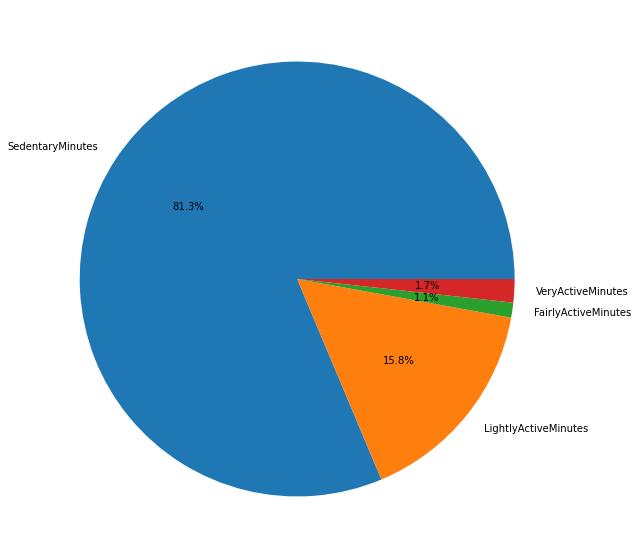

In [185]:
plt.figure(figsize=(14,10))
plt.pie(act_mean, labels=["SedentaryMinutes","LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes"],autopct='%1.1f%%')
plt.show()

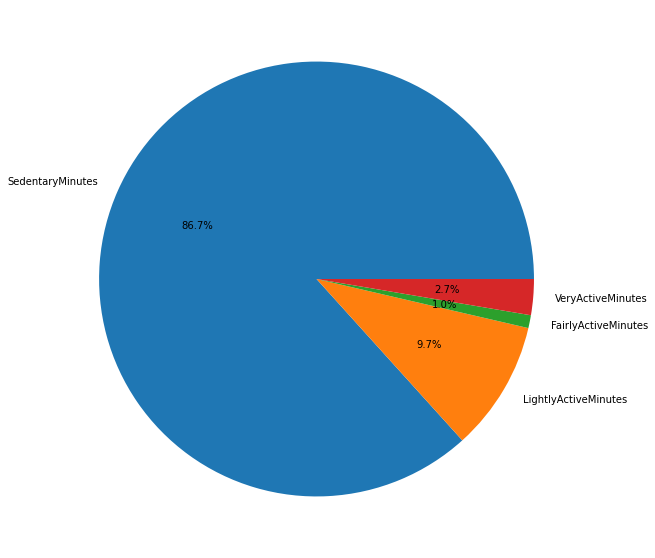

In [186]:
plt.figure(figsize=(14,10))
plt.pie(my_act_mean, labels=["SedentaryMinutes","LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes"],autopct='%1.1f%%')
plt.show()

활동량 평균시간을 원형그래프로 그려보면
앉아있는 시간 비율이 높고 나머지 세개의 활동단계 중에 매우 활동적인 비율이 높았다<br><br>

수면시간 역시 활동시간과 같이 전처리 해주었다

In [187]:
daily_sleep['SleepDay']=  pd.to_datetime(daily_sleep['SleepDay'])
daily_sleep["DayofWeek"] = daily_sleep["SleepDay"].dt.day_name()
daily_sleep["NotinBed"] = daily_sleep["TotalTimeInBed"] - daily_sleep["TotalMinutesAsleep"]
my_sleep['SleepDay']=  pd.to_datetime(my_sleep['SleepDay'])
my_sleep["DayofWeek"] = my_sleep["SleepDay"].dt.day_name()
my_sleep["NotinBed"] = my_sleep["TotalTimeInBed"] - my_sleep["TotalMinutesAsleep"]

<AxesSubplot:xlabel='TotalMinutesAsleep', ylabel='DayofWeek'>

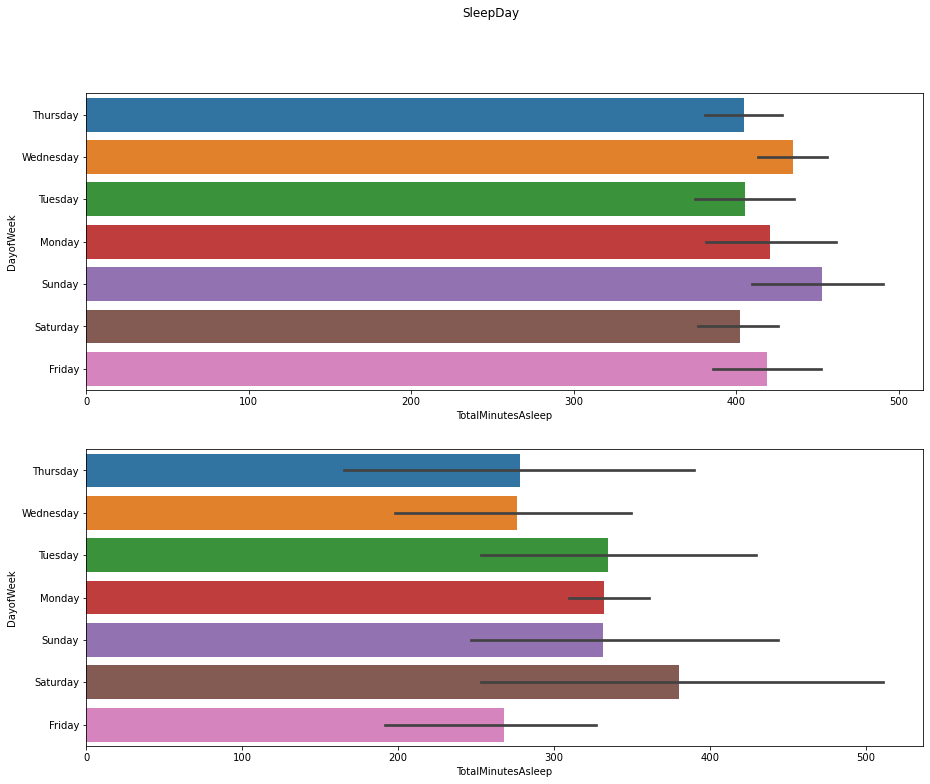

In [188]:
fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharey=True)
fig.suptitle('SleepDay')
sns.barplot(ax=axes[0],x=daily_sleep["TotalMinutesAsleep"], y=daily_sleep["DayofWeek"],)
sns.barplot(ax=axes[1],x=my_sleep["TotalMinutesAsleep"], y=my_sleep["DayofWeek"])

수면시간은 전체적으로 평균보다 낮았으며 불규칙적이다<br>
또한 평일보다 주말에 수면시간이 보다 많은데 주말에만 집에 올라가서 빠르게 잠들기 때문이라고 예상한다

## 결론

- 수면시간, 활동량, 걸음량등 여러 건강 지표가 평균보다 나쁘고 불규칙적이었다
- 요일을 이용한 분석결과는 값이 
- 